# Machine Learning: Session 3

In [1]:
import graphviz
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import tree
from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
CRED = '\033[91m'
CEND = '\033[0m'

## Task 1. Different distance measures in KNN (1 point)

The goal of this task is to understand better how different distance measures can affect the KNN performance. In addition, we are going to test the effect of normalizing input features and using weighted averaging for the nearest neighbours.

**(a)** Load the "wine" dataset from sklearn datasets, put input features into pandas dataframe and name the columns with feature names. <br>
Report the number of features and the number of classes in the dataset.

In [2]:
#Load dataset
wine = datasets.load_wine()
#HINTS:
#wine.data contains numpy array of dataset input features
#wine.target contains labels of instances
#wine.feature_names contains features labels

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    # Create a DataFrame from the wine dataset, using the feature names as column headers
    wine_train = pd.DataFrame(data=wine.data, columns=wine.feature_names)

    # Display the first 5 rows of the DataFrame to inspect the data
    display(wine_train.head())

    # Get the number of features (columns) in the DataFrame
    num_features = wine_train.shape[1]

    # Get the number of unique classes in the target variable (wine.target)
    num_classes = len(set(wine.target))

    # Print the number of features in the dataset
    print(f"The number of features is: {num_features}")

    # Print the number of classes in the dataset
    print(f"The number of classes is: {num_classes}")


    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


The number of features is: 13
The number of classes is: 3


**<font color='purple'>Answer to (a):</font>**

**(b)** Split the dataset into 80% training data and 20% test data using random seed = 22, and report the number of instances in the training set and in the test set.

In [3]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    # Split the dataset into 80% training data and 20% test data using random seed = 22
    X_train,X_test,y_train,y_test=train_test_split(wine.data,wine.target,test_size=0.2,random_state=22)
    print(f'the number of the train instances are : {X_train.shape[0]}')
    print(f'the number of the test instances are : {X_test.shape[0]}')
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

the number of the train instances are : 142
the number of the test instances are : 36


**<font color='purple'>Answer to (b):</font>**

**(c)** Use the KNN Classifier from Sklearn to fit a model for different values of K (3, 5, 7). Report test accuracy for each K. Report the best K to be used on this dataset.

In [4]:
try:
 # Define a function to evaluate the model's accuracy on the test data
    def model_eval(model, train_data, train_output, test_data, test_output):
        # Fit the model using the training data
        model.fit(train_data, train_output)
        
        # Predict the target values for the test data
        y_pred = model.predict(test_data)
        
        # Calculate the accuracy score by comparing the predicted values to the true test output
        model_accuracy = accuracy_score(test_output, y_pred)
        
        # Return the calculated accuracy
        return model_accuracy
        
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # List of k-values to test for the KNN model
    k_values = [3, 5, 7]
    
    # Variables to store the best k and best accuracy; initialized to None and negative infinity
    best_k = None
    best_accuracy = float('-inf')

    # Loop through the k-values and evaluate the model for each one
    for k in k_values:
        # Initialize the KNeighborsClassifier with the current k-value
        knn_model = KNeighborsClassifier(n_neighbors=k)
        
        # Evaluate the model and get the accuracy on the test data
        model_accuracy = model_eval(knn_model, X_train, y_train, X_test, y_test)
        
        # Print the accuracy for the current k-value
        print(f'The KNN model with {k} neighbors has accuracy: {model_accuracy}')
        
        # Update the best accuracy and best k if the current model is better than the previous best
        if model_accuracy > best_accuracy:
            best_accuracy = model_accuracy
            best_k = k

    # Print the best k-value and the corresponding accuracy
    print(f'The best k: {best_k}')
    print(f'The best accuracy: {best_accuracy}')
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

The KNN model with 3 neighbors has accuracy: 0.6666666666666666
The KNN model with 5 neighbors has accuracy: 0.6944444444444444
The KNN model with 7 neighbors has accuracy: 0.6666666666666666
The best k: 5
The best accuracy: 0.6944444444444444


**<font color='purple'>Answer to (c):</font>**

**(d)** Use the best value of K from the previous subtask, and try changing the distance metric used by KNN into euclidean, manhattan, chebyshev and minkowski with P = 3. Report the accuracy obtained with each metric. Report the best metric to be used on this dataset.

In [5]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    # Define a list of distance metrics to evaluate for the KNN model
    distance_metric = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

    # Initialize variables to keep track of the best distance metric and the highest accuracy
    best_metric = None
    best_accuracy = float('-inf')

    # Iterate over each distance metric in the list
    for metric in distance_metric:
        # Initialize the KNeighborsClassifier with the best_k neighbors and the current distance metric
        knn_model = KNeighborsClassifier(n_neighbors=best_k, metric=metric, p=3)
    
        # Evaluate the model accuracy using the model_eval function
        model_accuracy = model_eval(knn_model, X_train, y_train, X_test, y_test)
    
        # Print the accuracy for the current distance metric
        print(f'The KNN model with {metric} distance metric has accuracy: {model_accuracy}')
    
        # Update the best accuracy and best metric if the current model is better than the previous best
        if model_accuracy > best_accuracy:
            best_accuracy = model_accuracy
            best_metric = metric

    # Print the best distance metric and the corresponding accuracy
    print(f'The best distance metric: {best_metric}')
    print(f'The best accuracy: {best_accuracy}')

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

The KNN model with euclidean distance metric has accuracy: 0.6944444444444444
The KNN model with manhattan distance metric has accuracy: 0.7222222222222222
The KNN model with chebyshev distance metric has accuracy: 0.6666666666666666
The KNN model with minkowski distance metric has accuracy: 0.6944444444444444
The best distance metric: manhattan
The best accuracy: 0.7222222222222222


**<font color='purple'>Answer to (d):</font>**

**(e)** Try to use weights for nearest neighbors according to the inverse of their distance from the test instance. Use the best K found in **(c)** and the best distance metric found in **(d)**. Report the accuracy and discuss whether it is better to use weights or not. (Hint: Read about `weights` parameter from <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">HERE</a>)

In [6]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    knn_weight_model=KNeighborsClassifier(n_neighbors=best_k ,metric=best_metric, weights='distance')
    model_accuracy=model_eval(knn_weight_model,X_train,y_train,X_test,y_test)
    print(f'the accuracy of the weights for nearest neighbors model is {model_accuracy} ')
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

the accuracy of the weights for nearest neighbors model is 0.8055555555555556 


**<font color='purple'>Answer to (e):</font>**  using weights is get better results

**(f)** Standardize the features in the whole dataset by subtracting the mean and dividing by standard deviation from each feature (The mean and standard deviation should be calculated from the training instances only). Predict the accuracy using best parameters found in **(c)**, **(d)**, and **(e)**. Is it better to standardize / normalize your features before using KNN? WHY?

In [7]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    # Calculate the mean of each feature in the training set (X_train) along the columns (axis=0)
    mean = X_train.mean(axis=0)

    # Calculate the standard deviation of each feature in the training set (X_train) along the columns (axis=0)
    standard = X_train.std(axis=0)

    # Normalize the training data by subtracting the mean and dividing by the standard deviation
    normalized_X_train = (X_train - mean) / standard

    # Normalize the test data using the same mean and standard deviation from the training data
    normalized_X_test = (X_test - mean) / standard

    # Initialize a KNeighborsClassifier model with the best_k neighbors, the best_metric, and using distance-based weights
    knn_standardized_model = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric, weights='distance')

    # Evaluate the model accuracy on the standardized training and test sets using the model_eval function
    model_accuracy = model_eval(knn_standardized_model, normalized_X_train, y_train, normalized_X_test, y_test)

    # Print the accuracy of the KNN model after standardization
    print(f'The KNN accuracy after standardizing: {model_accuracy}')

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

The KNN accuracy after standardizing: 0.9444444444444444


**<font color='purple'>Answer to (f):</font>** Yes, you should standardize or normalize features before using KNN because it relies on distance calculations, which can be skewed by differing feature scales. Scaling ensures that all features contribute equally to the model's performance.

**(g)** Based on your observations during this task, write out what have you learnt so far when using the KNN learning algorithm.

**<font color='purple'>Answer to (g):</font>** It's important to fine-tune parameters that significantly influence model performance, which can be done by individually training each parameter and then merging them or by using cross-validation. Additionally, I've learned that standardizing features is crucial for KNN.

## Task 2. Linear and polynomial kernels in SVM (2 points)

The goal of this task is to understand better how the choice of kernel and parameter values affect the performance of SVM. You are given a two-dimensional dataset with a binary label and two features: $x_1$ and $x_2$. Your class labels are generated from the features using the XOR function, such that the class is positive when either $x_1 > 0$ or $x_2 > 0$ but not both. The following code creates this dataset and plots it.

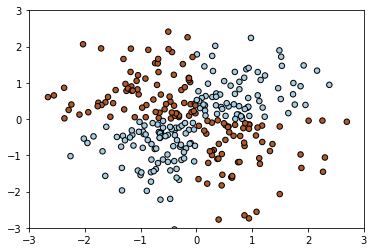

In [8]:
train_X = np.random.randn(300, 2)
train_Y = np.logical_xor(train_X[:, 0] > 0, train_X[:, 1] > 0)

plt.scatter(train_X[:, 0], train_X[:, 1], s=30, c=train_Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.axis([-3, 3, -3, 3])
plt.show()

- **(a)** Let's first learn SVM with the linear kernel. Please fill in the 2 gaps in the code.

In [9]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # fit the model here:
    svm_model = svm.SVC(kernel='linear')
    svm_model.fit(train_X,train_Y)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

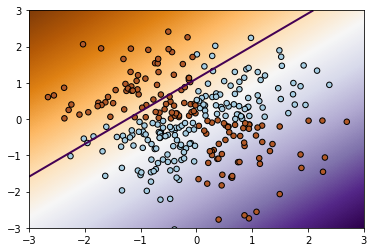

In [10]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

def plot_svm(model, X, Y, ax = None):
    # plots the decision function for each datapoint on the grid
    
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    if ax is None:
        plt.imshow(Z, interpolation='nearest',
                   extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
                   origin='lower', cmap=plt.cm.PuOr_r)
        contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2)
        plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                    edgecolors='k')
        plt.axis([-3, 3, -3, 3])
        plt.show()
    else:
        ax.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
        contours = ax.contour(xx, yy, Z, levels=[0], linewidths=2)
        ax.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                    edgecolors='k')
        ax.axis([-3, 3, -3, 3])

try:
    plot_svm(svm_model, train_X, train_Y)
except Exception as e:
    print("Exception:", e)

- **(b)** Can SVM with the linear kernel separate these data?  

**<font color='purple'>Answer to (b):</font>**
No


- **(c)** Now learn the SVM model with the polynomial kernel of degree 2 and degree 3. Which of them is able to learn the XOR function (not perfectly but reasonably well)?

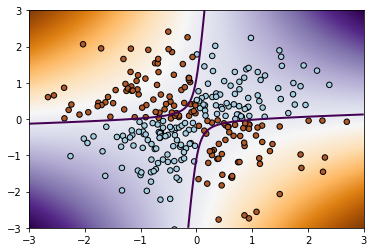

In [11]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Degree 2
    svm_poly_model_2 = svm.SVC(kernel='poly',degree=2)
    svm_poly_model_2.fit(train_X,train_Y)
    plot_svm(svm_poly_model_2,train_X,train_Y)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

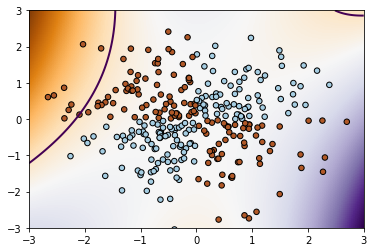

In [12]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Degree 3
    svm_poly_model_3 = svm.SVC(kernel='poly',degree=3)
    svm_poly_model_3.fit(train_X,train_Y)
    plot_svm(svm_poly_model_3,train_X,train_Y)
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (c):</font>**
 The one with second Degree

- **(d)** Let us try to understand the reason why one degree worked well and the other not. Which of the following features is the most useful in discriminating the two classes: $x_1$, $x_2$, $x_1^2$, $x_2^2$, $x_1^3$, $x_2^3$, $x_1 x_2$, $x_1^2 x_2$, $x_2^2 x_1$? (Hint: If you cannot guess the right answer then you could visualize these as a surface, example code for $x_2^2 x_1$ is shown below where lighter colour is a hill and darker is valley)

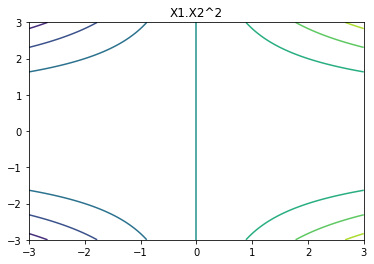

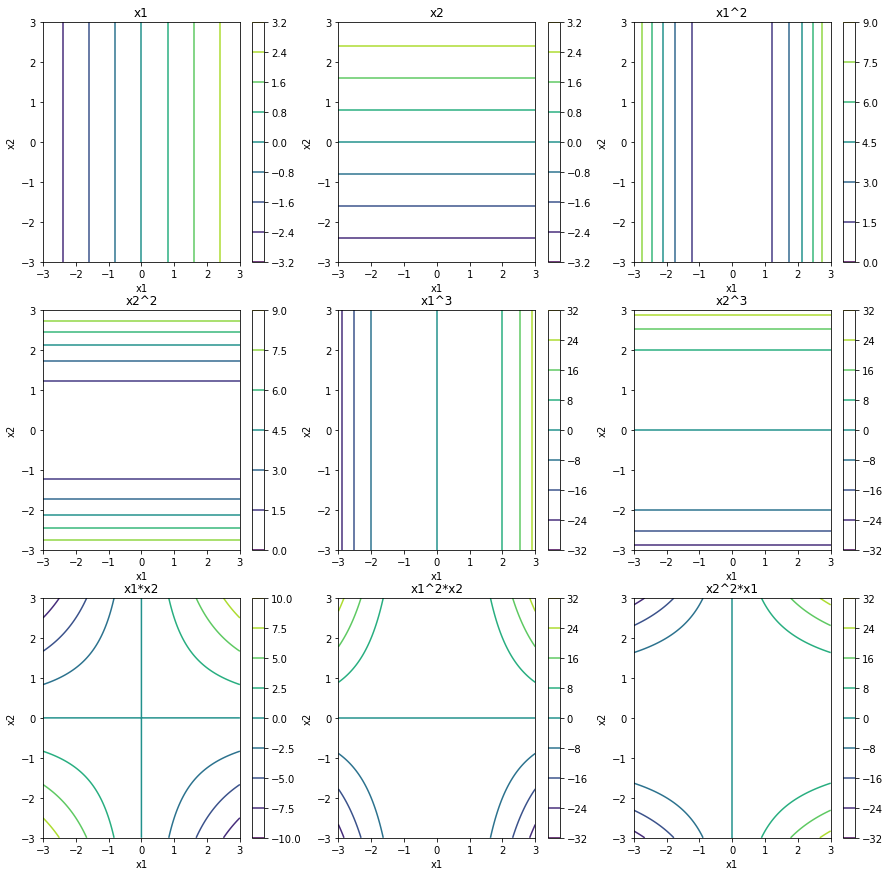

In [13]:
plt.contour(xx, yy, yy*yy*xx)
plt.title('X1.X2^2')
plt.show()
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    # Define features
    features = {
    "x1": xx,
    "x2": yy,
    "x1^2": xx**2,
    "x2^2": yy**2,
    "x1^3": xx**3,
    "x2^3": yy**3,
    "x1*x2": xx * yy,
    "x1^2*x2": xx**2 * yy,
    "x2^2*x1": yy**2 * xx
    }
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()

    # Visualize rest of the features similarly as above
    for i, (feature_name, feature_values) in enumerate(features.items()):
        ax = axes[i]
        contour = ax.contour(xx, yy, feature_values)
        ax.set_title(feature_name)
        ax.set_xlabel("x1")
        ax.set_ylabel("x2")
        fig.colorbar(contour, ax=ax)
    plt.show()

        
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (d):</font>**
The second-degree polynomial has a stronger impact due to its second-degree features. In the plot, we observe distinct peaks and valleys, indicating significant influence in differentiating between classes. In contrast, features with smoother surfaces, without such variations, have less impact on class discrimination.


- **(e)** Expand the expression $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^2$ (open the brackets) where $\mathbf{x}=(x_1,x_2)$ and $\mathbf{z}=(z_1,z_2)$. **<font color='purple'>For this please modify the following code for your purpose:</font>** Hint: we did this in the practice session, but you can follow a similar example at page 51 of Lecture 05.

In [14]:
import sympy as sp
sp.init_printing(use_latex='mathjax')

try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    #Example
#     a, b = sp.symbols('a_1 b_2')
#     sp.expand( (a + b)**2 )

    # Define symbolic variables x1, x2, z1, and z2 using sympy
    x1, x2, z1, z2 = sp.symbols('x1 x2 z1 z2')

    # Expand the polynomial expression ((x1 * z1) + (x2 * z2)) raised to the power of 2
    sp_second = sp.expand(((x1 * z1) + (x2 * z2)) ** 2)

    # Print the expanded polynomial expression
    print(sp_second)

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

x1**2*z1**2 + 2*x1*x2*z1*z2 + x2**2*z2**2


- **(f)** Please now list all features that are included in the constructed feature space $\phi(\mathbf{x})$ corresponding to the kernel $\kappa(\mathbf{x},\mathbf{z})=(\mathbf{x}\cdot\mathbf{z})^2$. Hint: You can read this out from your answer to **(e)** because $\kappa(\mathbf{x},\mathbf{z})=\phi(\mathbf{x})\cdot\phi(\mathbf{z})$.

**<font color='purple'>Answer to (f):</font>**
$\phi(x)=(x1^2, x2^2 ,root(2)x1 *x2)$

- **(g)** Is the best discriminator from subtask **(d)** present among the constructed features as listed in subtask **(f)**? Does this explain why polynomial kernel with degree 2 performed well / not well in subtask **(c)**? 

**<font color='purple'>Answer to (g):</font>**
yes , it is and yes , it does 

- **(h)** Please now expand the expression $\kappa(\mathbf{x},\mathbf{z})=\left(\mathbf{x}\cdot\mathbf{z}\right)^3$ similarly to subtask **(e)** and list the features in the constructed feature space $\phi(\mathbf{x})$ corresponding to this kernel, as in subtask **(f)**. 

In [15]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    # Define symbolic variables x1, x2, z1, and z2 using sympy
    x1, x2, z1, z2 = sp.symbols('x1 x2 z1 z2')

    # Expand the polynomial expression ((x1 * z1) + (x2 * z2)) raised to the power of 3
    sp_third = sp.expand(((x1 * z1) + (x2 * z2)) ** 3)

    # Print the expanded polynomial expression
    print(sp_third)

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

x1**3*z1**3 + 3*x1**2*x2*z1**2*z2 + 3*x1*x2**2*z1*z2**2 + x2**3*z2**3


**<font color='purple'>Answer to (h):</font>**
$\phi(x)=(x1^3 , root(3)*x1^2 *x2 , root(3)*x1 *x2^2 , x2^3)$

- **(i)** Is the best discriminator from subtask **(d)** present among the constructed features as listed in subtask **(h)**? Does this explain why polynomial kernel with degree 3 performed well / not well in subtask **(c)**? 

**<font color='purple'>Answer to (i):</font>**
No ,its not there & yes it explains why since it operates best on cubic relations which is not one of the features that has a strong influence in our dataset


- **(j)** The polynomial kernel is actually defined by $\kappa(\mathbf{x},\mathbf{z}) = (\mathbf{x}\cdot\mathbf{z}+r)^d$, but by default this r is 0. Take $r = 1$ and $d = 3$ and list the features in the constructed feature space $\phi(\mathbf{x})$ corresponding to this kernel. Is the necessary feature present now?

In [16]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Define the degree (d) and the constant (r) for the polynomial expansion
    d = 3
    r = 1

    # Define the symbolic variables x1, x2, z1, and z2 using sympy
    x1, x2, z1, z2 = sp.symbols('x1 x2 z1 z2')

    # Expand the polynomial expression ((x1 * z1) + (x2 * z2) + r) raised to the power of d
    sp_ploy = sp.expand(((x1 * z1) + (x2 * z2) + r) ** d)

    # Print the expanded polynomial expression
    print(sp_ploy)

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

x1**3*z1**3 + 3*x1**2*x2*z1**2*z2 + 3*x1**2*z1**2 + 3*x1*x2**2*z1*z2**2 + 6*x1*x2*z1*z2 + 3*x1*z1 + x2**3*z2**3 + 3*x2**2*z2**2 + 3*x2*z2 + 1


**<font color='purple'>Answer to (j):</font>**
$\phi(x)=(x1^3 , root(3) x1^2 , root(3) x1 ,1 ,root(3)*x1^2 *x2 , root(3)*x1 *x2^2 , root(3)* x2^2 , root(3)* x2, root(3)*x1*x2, x2^3)$

yes it contains 2nd degree terms



- **(k)** The value $r$ is represented by parameter 'coef0' in the SVC function. Change it to 1 and see if you can now learn XOR with polynomial kernel of degree 3. Make the resulting plot and report if learning of XOR succeeded.

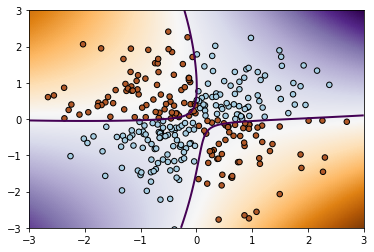

In [17]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
    #raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Initialize an SVM classifier with a polynomial kernel, setting degree to 3 and coef0 to 1
    svm_poly = svm.SVC(kernel='poly', degree=3, coef0=1)

    # Fit the SVM model to the training data (train_X, train_Y)
    svm_poly.fit(train_X, train_Y)

    # Visualize the decision boundary of the trained SVM model using the plot_svm function
    plot_svm(svm_poly, train_X, train_Y)

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (k):</font>**
yes,it is

## Task 3: Gaussian kernel in SVM (1 point)

- **(a)** Make __6__ plots and show how RBF kernel works with different C values: 0.1, 0.5, 1, 2, 10, 100. What do you observe? What does parameter C do? 

    - Hint 1: Remember the soft-margin SVM formula and check out what the C parameter stood for. 
    - Hint 2: Use `plt.subplots(2, 3, figsize=...)` to arrange them nicely and `plot_svm(svm_model, train_X, train_Y, ax=ax[i][j])` to plot to the subplot in row i and column j. 
    - Hint 3: Make sure you run `plt.show()` after the plotting.

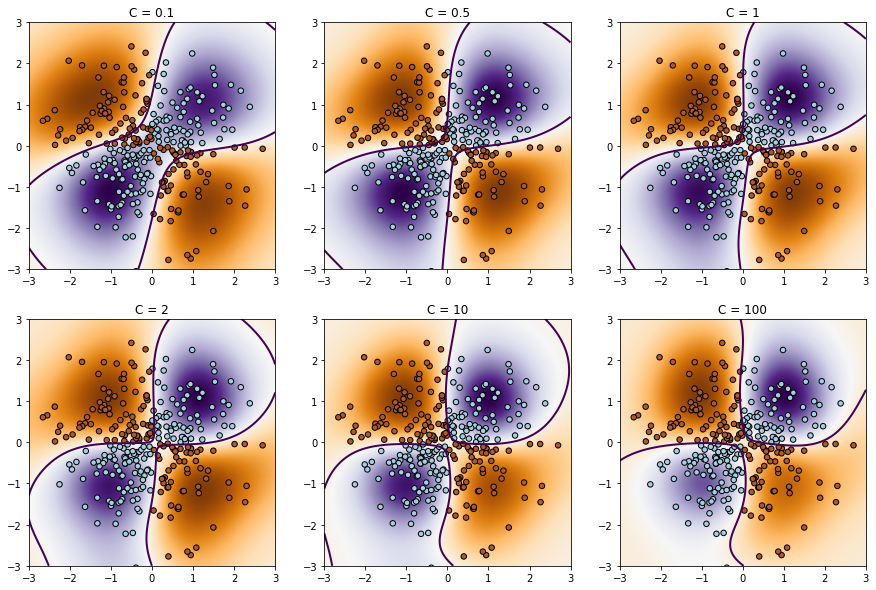

In [18]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    # Define a list of different C values to explore for the RBF kernel in SVM
    C_values = [0.1, 0.5, 1, 2, 10, 100]

    # Create a figure with 2 rows and 3 columns of subplots, and set the figure size to 15x10
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))

    # Iterate over the C values and their corresponding index
    for i, C in enumerate(C_values):
        # Determine the row and column position of the subplot based on the index
        row = i // 3
        col = i % 3

        # Set the title of the current subplot to display the C value
        ax[row, col].set_title(f'C = {C}')

        # Initialize an SVM classifier with an RBF kernel and the current C value
        svm_rbf = svm.SVC(kernel='rbf', C=C)

        # Fit the SVM model to the training data (train_X, train_Y)
        svm_rbf.fit(train_X, train_Y)

        # Call the plot_svm function to visualize the decision boundary in the current subplot (ax[row, col])
        plot_svm(svm_rbf, train_X, train_Y, ax[row, col])

        
    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (a):</font>**
i observe that as c incease the model overfits the dataset  

- **(b)** Now change the gamma parameter: 0.01, 0.5, 1, 2, 10, 100 and do the same as in the subtask **(a)**. What does the gamma parameter do? (Hint: check out the Gaussian kernel formula and rememeber that $\gamma = \frac{1}{2\sigma}$).

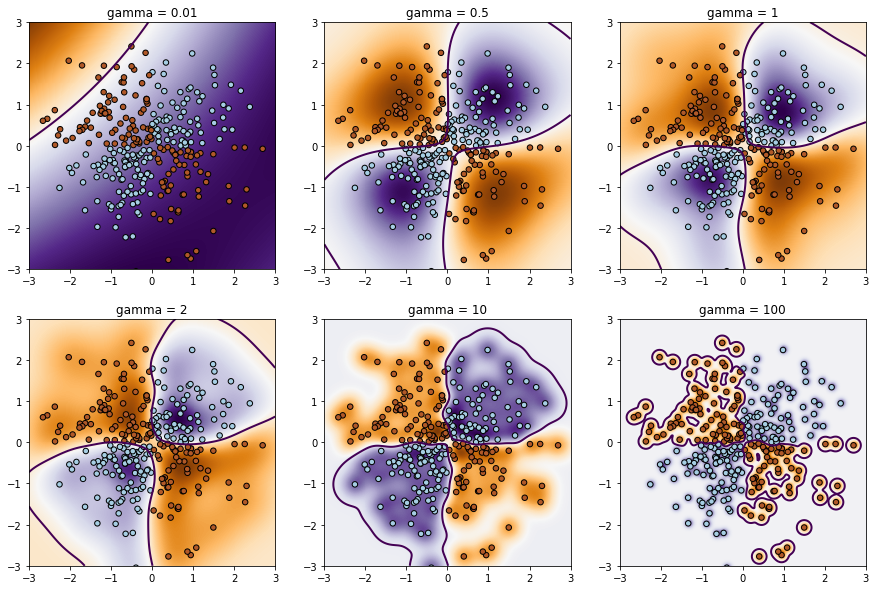

In [19]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")

    # Define a list of different gamma values to explore for the RBF kernel in SVM
    gamma_values = [0.01, 0.5, 1, 2, 10, 100]

    # Create a figure with 2 rows and 3 columns of subplots, and set the figure size to 15x10
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))

    # Iterate over the gamma values and their corresponding index
    for i, gamma in enumerate(gamma_values):
        # Determine the row and column position of the subplot based on the index
        row = i // 3
        col = i % 3

        # Set the title of the current subplot to display the gamma value
        ax[row, col].set_title(f'gamma = {gamma}')

        # Initialize an SVM classifier with an RBF kernel and the current gamma value
        svm_rbf = svm.SVC(kernel='rbf', gamma=gamma)

        # Fit the SVM model to the training data (train_X, train_Y)
        svm_rbf.fit(train_X, train_Y)

        # Call the plot_svm function to visualize the decision boundary in the current subplot (ax[row, col])
        plot_svm(svm_rbf, train_X, train_Y, ax[row, col])

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

**<font color='purple'>Answer to (b):</font>**
The more the gamma increases the more it makes the decision boundary sensitive to each point and makes the model overfits


## Task 4: Decision tree learning (2 points)

The goal of this task is to understand better how the parameter values affect the performance of decision trees. We will do this on the dataset 'adult.data.csv' originating from https://archive.ics.uci.edu/ml/datasets/adult . This data file has been packaged together with the notebook. The following code loads the dataset and prepares it for the task.

**Install graphiz package for decision tree visualization in case it is not installed**
!pip install graphviz

#### In case you still have some issues with graphviz package:
**For Windows Users**: You can download graphviz from [<a href = "https://graphviz.gitlab.io/_pages/Download/Download_windows.html">HERE</a>] Then add it to the system path using the following commands. <br>
```
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'```

**For Ubuntu Linux Users:** try to use the following command to install graphviz
```sudo apt-get install graphviz```

**For MAC Users:** Use the following package
```brew install graphviz```

In [20]:
np.random.seed(0)
data = pd.read_csv("adult.data.csv", dtype="category", header = None, index_col = None, na_values=["NA", " ?", ""])
data.columns = ["age", "workclass", "not_needed1", "education1", "education", "marital_status",
               "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
               "hours_per_week", "country", "income"]
data.dropna(inplace = True)
data["age"] = pd.to_numeric(data["age"])
data["education"] = pd.to_numeric(data["education"])
data["capital_gain"] = pd.to_numeric(data["capital_gain"])
data["capital_loss"] = pd.to_numeric(data["capital_loss"])
data["hours_per_week"] = pd.to_numeric(data["hours_per_week"])
data["capital_gain"] = data["capital_gain"] - data["capital_loss"]
data["income"] = data.income.str.strip()
data.drop(["not_needed1", "education1", "relationship", "capital_gain", "capital_loss",
          "country"], axis = 1, inplace = True)
a = data[data.income == ">50K"].index
b = data[data.income == "<=50K"].index
b = np.random.choice(b, size = len(a), replace = False)
data = data.loc[np.concatenate([a, b])]

In [21]:
data.head()

,age,workclass,education,marital_status,occupation,race,sex,hours_per_week,income
7,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,White,Male,45,>50K
8,31,Private,14,Never-married,Prof-specialty,White,Female,50,>50K
9,42,Private,13,Married-civ-spouse,Exec-managerial,White,Male,40,>50K
10,37,Private,10,Married-civ-spouse,Exec-managerial,Black,Male,80,>50K
11,30,State-gov,13,Married-civ-spouse,Prof-specialty,Asian-Pac-Islander,Male,40,>50K


The decision tree implementation in sklearn requires all features to be numeric. We will therefore create a new binary feature for each value of each textual variable.

In [22]:
data = pd.get_dummies(data, columns = ["workclass", "marital_status", "occupation", "race", "sex"])
data.head()

,age,education,hours_per_week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male
7,52,9,45,>50K,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
8,31,14,50,>50K,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
9,42,13,40,>50K,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
10,37,10,80,>50K,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
11,30,13,40,>50K,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


We will consider the binary classification task of predicting income:

In [23]:
data.income.value_counts()

>50K     7508
<=50K    7508
Name: income, dtype: int64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["income"], axis = 1),
                                                    data["income"], test_size = 0.5, random_state = 0)

- **(a)** First build a decision tree of maximum depth 2, calculate train and test accuracies.

In [25]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # fit the model here:
    # Initialize a DecisionTreeClassifier with a maximum depth of 2
    dt = DecisionTreeClassifier(max_depth=2)

    # Fit the decision tree model to the training data (X_train, y_train)
    dt.fit(X_train, y_train)

    # Use the trained model to predict labels for the test set (X_test)
    predicted_y = dt.predict(X_test)

    # Calculate the training accuracy of the model on the training set
    train_accuracy = dt.score(X_train, y_train)

    # Calculate the test accuracy of the model on the test set
    test_accuracy = dt.score(X_test, y_test)

    # Print the training and test accuracy, indicating that the tree has a maximum depth of 2
    print(f"The decision tree with depth 2 had:\n  training accuracy: {train_accuracy}\n  test accuracy: {test_accuracy}")

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

The decision tree with depth 2 had:
  training accuracy: 0.7559936068193926
  test accuracy: 0.7566595631326585


**<font color='purple'>Answer to (a):</font>**


- **(b)** Plot the tree using the following code. Interpret the tree by verbally explaining what decisions it makes on different feature values.

In [26]:
try:
    dot_data = tree.export_graphviz(dt, out_file=None,
                                    feature_names=X_train.columns,  
                                    class_names=["<=50K", ">50K"],  
                                    filled=True, rounded=True, 
                                    special_characters=False) 
    graph = graphviz.Source(dot_data)
    graph.render('decision_tree')  # Save the visualization to a file
    graph.view()  # Display the visualization
except Exception as e:
    print("Exception:", e)    

**<font color='purple'>Answer to (b):</font>**
The decision tree makes the following decisions:

- If education_num <= 12.5, predict <=50K
- If education_num > 12.5 and marital_status_married-civ-spouse <= 0.5, predict >50K
- If education_num > 12.5 and marital_status_married-civ-spouse > 0.5, predict <=50K


**(c)** Explain how decision tree deals with:

1. binary features
2. categorical features
3. continuous features

by describing what all possible splits are that the learning algorithm considers in case of these three types.

**<font color='purple'>Answer to (c):</font>**
- Binary Features:
Binary features can take on only two values (e.g., True/False or 0/1). The decision tree can split the data based on the feature's value, creating two branches for cases where the feature is either True or False.

- Categorical Features:
Categorical features consist of distinct values that represent different categories or labels (e.g., colors or types). The decision tree splits the data by each unique category, resulting in branches for every category present in the feature.

- Continuous Features:
Continuous features can have a range of values (e.g., age or income). The decision tree performs binary splits by evaluating various threshold values for the continuous feature, selecting the threshold that maximizes information gain or minimizes Gini impurity. For instance, for the feature 'age', it may create branches like 'age <= 30' and 'age > 30'.

- **(d)** Next, build a tree with the default parameters and calculate the train and test accuracy. Is the model good? Why/why not? Explain what are the default parameters used in sklearn for decision tree and how they influence this kind of result?

In [27]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Initialize a DecisionTreeClassifier with default parameters
    default_t = DecisionTreeClassifier()

    # Fit the decision tree model to the training data (X_train, y_train)
    default_t.fit(X_train, y_train)

    # Use the trained model to predict labels for the test set (X_test)
    predicted_y = default_t.predict(X_test)

    # Calculate the training accuracy of the model on the training set
    train_accuracy = default_t.score(X_train, y_train)

    # Calculate the test accuracy of the model on the test set
    test_accuracy = default_t.score(X_test, y_test)

    # Print the training and test accuracy, indicating that the tree was trained with default depth (implicitly 2 in this case)
    print(f"The default tree with depth 2 had:\n  training accuracy: {train_accuracy}\n  test accuracy: {test_accuracy}")

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

The default tree with depth 2 had:
  training accuracy: 0.9790889717634523
  test accuracy: 0.7334842834310069


**<font color='purple'>Answer to (d):</font>**
the default parameters :
- criterion='gini
- max_depth=None
- min_samples_split=2
- min_samples_leaf=1
- max_features=None

The model is not performing well because the training accuracy is high while the test accuracy is significantly lower which means the model overfits the training data . I believe this is due to the absence of a maximum depth limit, which may lead to overfitting.


- **(e)** Modify the learning algorithm to get rid of the problem you had in the previous step. Try to change at least 3 parameters (first one at a time, then all together, try different combinations). Report the three parameters you experimented with and explain how they can be used to improve the tree (what do they do?). Which values did you try and what gave the best results? Build the final tree (don't show the experimenting code) and report train and test accuracies. You should achieve test accuracy > 79% without too much overfitting (meaning that training accuracy should be quite similar).

In [28]:
def tree_evel(tree_model, X_train,y_train,X_test,y_test):
    tree_model.fit(X_train,y_train)
    predicted_y=tree_model.predict(X_test)
    train_accuracy = tree_model.score(X_train, y_train)
    test_accuracy = tree_model.score(X_test, y_test)
    return train_accuracy,test_accuracy
    
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    tree_1 = DecisionTreeClassifier(max_depth=4,criterion='gini',splitter='best')
    train_accuracy_1,test_accuracy_1=tree_evel(tree_1, X_train,y_train,X_test,y_test)
    print(f"the tree 1 has :\n  training accuracy : {train_accuracy_1}\n  test accuracy : {test_accuracy_1}")

    tree_2 = DecisionTreeClassifier(max_depth=5,criterion='entropy',splitter="random")
    train_accuracy_2,test_accuracy_2=tree_evel(tree_2, X_train,y_train,X_test,y_test)
    print(f"the tree 2 has :\n  training accuracy : {train_accuracy_2}\n  test accuracy : {test_accuracy_2}")

    tree_3 = DecisionTreeClassifier(max_depth=5,criterion='gini',splitter='best')
    train_accuracy_3,test_accuracy_3=tree_evel(tree_3, X_train,y_train,X_test,y_test)
    print(f"the tree 3 has :\n  training accuracy : {train_accuracy_3}\n  test accuracy : {test_accuracy_3}")

    tree_4 = DecisionTreeClassifier(max_depth=7,criterion='entropy',splitter="random")
    train_accuracy_4,test_accuracy_4=tree_evel(tree_4, X_train,y_train,X_test,y_test)
    print(f"the tree 4 has :\n  training accuracy : {train_accuracy_4}\n  test accuracy : {test_accuracy_4}")

    tree_5 = DecisionTreeClassifier(max_depth=7,criterion='gini',splitter='best')
    train_accuracy_5,test_accuracy_5=tree_evel(tree_5, X_train,y_train,X_test,y_test)
    print(f"the tree 5 has :\n  training accuracy : {train_accuracy_5}\n  test accuracy : {test_accuracy_5}")

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

the tree 1 has :
  training accuracy : 0.7939531166755461
  test accuracy : 0.7879595098561535
the tree 2 has :
  training accuracy : 0.7922216302610549
  test accuracy : 0.7864944059669685
the tree 3 has :
  training accuracy : 0.8122003196590304
  test accuracy : 0.7999467234949388
the tree 4 has :
  training accuracy : 0.8038092701118806
  test accuracy : 0.7851624933404369
the tree 5 has :
  training accuracy : 0.8237879595098562
  test accuracy : 0.7983484283431007


**<font color='purple'>Answer to (e):</font>**
- **max_depth=5, criterion='gini', splitter='best**: By limiting the maximum depth to 5, this configuration reduces overfitting compared to an unrestricted depth. Additionally, using the Gini index as the criterion measures impurity, enhancing the confidence in predictions.

- **(f)** Now build a tree with max_depth = 7 and visualize it. Explain how to classify the first testing instance X_test.iloc[0] by visually exploring the tree (list all the nodes visited along the path through the tree until the decision). Is the decision the same as the true label? Does the decision path make sense?

In [29]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line) 
    dt_depth_7 = DecisionTreeClassifier(max_depth=7)
    dt_depth_7.fit(X_train, y_train)

    # Visualize the tree
    dot_data_depth_7 = tree.export_graphviz(dt_depth_7, out_file=None,
                                            feature_names=X_train.columns,
                                            class_names=["<=50K", ">50K"],
                                            filled=True, rounded=True,
                                            special_characters=False)
    graph_depth_7 = graphviz.Source(dot_data_depth_7)
    graph_depth_7.render('decision_tree_depth_7')  # Save the visualization to a file
    graph_depth_7.view()  # Display the visualization

    # Classify the first testing instance and retrieve the decision path
    first_test_instance = X_test.iloc[0]
    decision_path = dt_depth_7.decision_path([first_test_instance])

    # Print the decision path
    print("Decision path for classifying the first testing instance:")
    for node_index in decision_path.indices:
        print("Node: ", node_index)
        print("Split feature: ", X_train.columns[dt_depth_7.tree_.feature[node_index]])
        print("Split threshold: ", dt_depth_7.tree_.threshold[node_index])
        print("Decision: ", "Class >50K" if dt_depth_7.tree_.value[node_index][0][1] > dt_depth_7.tree_.value[node_index][0][0] else "Class <=50K")

    # Predict the class for the first testing instance
    predicted_label = dt_depth_7.predict([first_test_instance])
    print("Predicted Label: ", predicted_label[0])
    print("True Label: ", y_test.iloc[0])
    ##### YOUR CODE ENDS ##### (please do not delete this line)
    
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

Decision path for classifying the first testing instance:
Node:  0
Split feature:  marital_status_ Married-civ-spouse
Split threshold:  0.5
Decision:  Class >50K
Node:  1
Split feature:  education
Split threshold:  12.5
Decision:  Class <=50K
Node:  2
Split feature:  hours_per_week
Split threshold:  42.5
Decision:  Class <=50K
Node:  3
Split feature:  age
Split threshold:  32.5
Decision:  Class <=50K
Node:  19
Split feature:  occupation_ Prof-specialty
Split threshold:  0.5
Decision:  Class <=50K
Node:  20
Split feature:  marital_status_ Married-AF-spouse
Split threshold:  0.5
Decision:  Class <=50K
Node:  21
Split feature:  occupation_ Exec-managerial
Split threshold:  0.5
Decision:  Class <=50K
Node:  22
Split feature:  sex_ Female
Split threshold:  -2.0
Decision:  Class <=50K
Predicted Label:  <=50K
True Label:  <=50K


**<font color='purple'>Answer to (f):</font>**
yes, The predicted label based on this decision path is "<=50K",matching the true label of the first testing instance ("<50K").

yes, the decision path make sense

- **(g)** What seem to be the most important features? Check out the feature importances given by the sklearn model from **(f)**. Do they agree with your guess? How are these feature importances calculated? Hint: feature importances are given by `dt.feature_importances_`

In [30]:
try:
    ##### YOUR CODE STARTS ##### (please do not delete this line)
#     raise NotImplementedError("You need to remove \"raise NotImplementedErrors\" lines after writing your code!")
    # Get the feature importances from the trained decision tree model with a max depth of 7
    feature_importances = dt_depth_7.feature_importances_

    # Create a dictionary mapping each feature (column in X_train) to its corresponding importance score
    feature_importance_dict = dict(zip(X_train.columns, feature_importances))

    # Sort the features by their importance score in descending order (most important first)
    feature_importances_sorted = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

    # Loop through the sorted features and their importance scores, and print them
    for feature, importance in feature_importances_sorted:
        print(f'The feature {feature} has importance: {importance}')

    ##### YOUR CODE ENDS ##### (please do not delete this line)
except NotImplementedError as e:
    print(CRED,"TODO:",e,CEND)
except Exception as e:
    print("Exception:", e)

The feature marital_status_ Married-civ-spouse has importance: 0.5408094149866806
The feature education has importance: 0.2330022290014731
The feature age has importance: 0.10545330978323483
The feature hours_per_week has importance: 0.05317283790596098
The feature occupation_ Exec-managerial has importance: 0.01291926639198902
The feature occupation_ Other-service has importance: 0.006689011100580188
The feature occupation_ Prof-specialty has importance: 0.0053872494259778435
The feature workclass_ Self-emp-not-inc has importance: 0.005202949152644222
The feature occupation_ Farming-fishing has importance: 0.004815800314715938
The feature workclass_ Private has importance: 0.0036780319965523667
The feature sex_ Female has importance: 0.0034590870539823334
The feature sex_ Male has importance: 0.003114253806110715
The feature workclass_ Self-emp-inc has importance: 0.002947438292810097
The feature marital_status_ Married-AF-spouse has importance: 0.0027581488092928404
The feature occup

**<font color='purple'>Answer to (g):</font>**
i think the most important features  marital_status ,education and hours_per_week
and yes, they matched the model output


 ## <font color='red'>This was the last task! Please restart and run all before submission!</font>